In [1]:
import importlib
import textalloc as ta
importlib.reload(ta)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Demo

Examples of text allocation in various plots. Textalloc currently supports avoiding overlap with points and lines.

### Scatterplots:

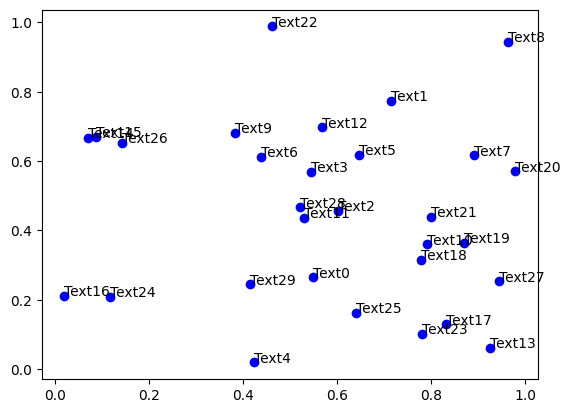

In [2]:
np.random.seed(0)
x, y = np.random.random((2,30))
fig, ax = plt.subplots()
ax.scatter(x, y, c='b')
texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
plt.show()

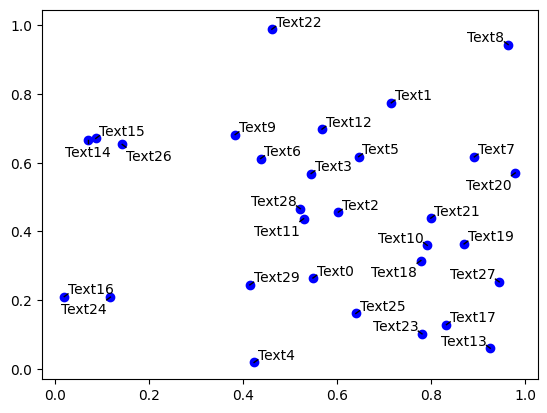

In [4]:
np.random.seed(0)
x, y = np.random.random((2,30))
fig, ax = plt.subplots()
ax.scatter(x, y, c='b')
text_list = [f'Text{i}' for i in range(len(x))]
fig, ax = ta.allocate_text(fig, ax, x, y, text_list, ax.get_xlim(), ax.get_ylim(), x_scatter=x, y_scatter=y, draw_lines=True, linecolor="k")
plt.show()

### Lineplots:

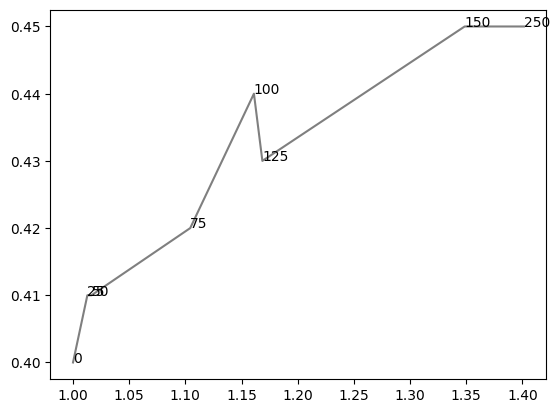

In [5]:
together = [(0, 1.0, 0.4), (25, 1.0127692669427917, 0.41), (50, 1.016404709797609, 0.41), (75, 1.1043426359673716, 0.42), (100, 1.1610446924342996, 0.44), (125, 1.1685687930691457, 0.43), (150, 1.3486407784550272, 0.45), (250, 1.4013999168008104, 0.45)]
together.sort()

text = [str(x) for (x,y,z) in together]
eucs = [y for (x,y,z) in together]
covers = [z for (x,y,z) in together]
fig, ax = plt.subplots()
ax.plot(eucs,covers,color="black", alpha=0.5)
texts = []
for xt, yt, s in zip(eucs, covers, text):
    texts.append(ax.text(xt, yt, s))
plt.show()

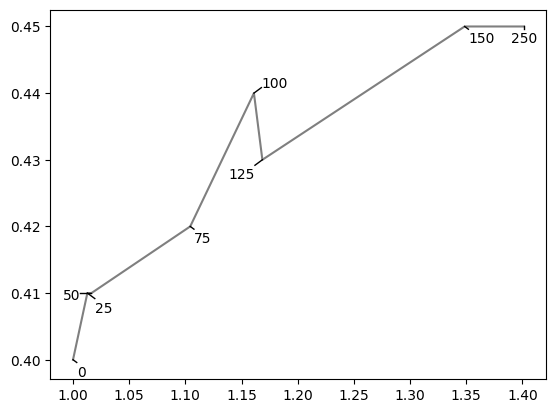

In [6]:
together = [(0, 1.0, 0.4), (25, 1.0127692669427917, 0.41), (50, 1.016404709797609, 0.41), (75, 1.1043426359673716, 0.42), (100, 1.1610446924342996, 0.44), (125, 1.1685687930691457, 0.43), (150, 1.3486407784550272, 0.45), (250, 1.4013999168008104, 0.45)]
together.sort()

text = [str(x) for (x,y,z) in together]
eucs = [y for (x,y,z) in together]
covers = [z for (x,y,z) in together]
fig,ax = plt.subplots()
ax.plot(eucs,covers,color="black", alpha=0.5)
fig, ax = ta.allocate_text(fig, ax, eucs, covers, text, ax.get_xlim(), ax.get_ylim(), x_lines=[eucs], y_lines=[covers], draw_lines=True)
plt.show()

### Combined:

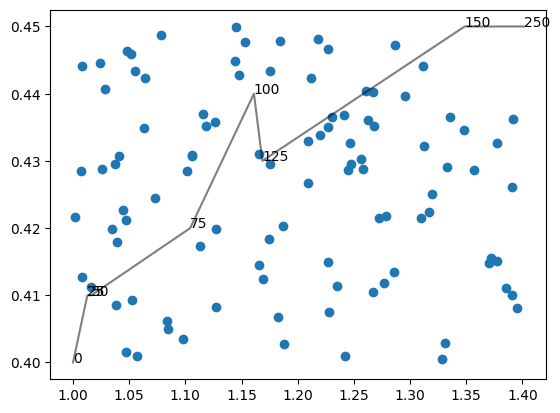

In [7]:
together = [(0, 1.0, 0.4), (25, 1.0127692669427917, 0.41), (50, 1.016404709797609, 0.41), (75, 1.1043426359673716, 0.42), (100, 1.1610446924342996, 0.44), (125, 1.1685687930691457, 0.43), (150, 1.3486407784550272, 0.45), (250, 1.4013999168008104, 0.45)]
together.sort()
np.random.seed(0)
x, y = np.random.random((2,100))
x = x*0.4+1
y = y*0.05+0.4

text = [str(x) for (x,y,z) in together]
eucs = [y for (x,y,z) in together]
covers = [z for (x,y,z) in together]
fig,ax = plt.subplots()
ax.plot(eucs,covers,color="black", alpha=0.5)
ax.scatter(x,y)
texts = []
for xt, yt, s in zip(eucs, covers, text):
    texts.append(ax.text(xt, yt, s))
plt.show()

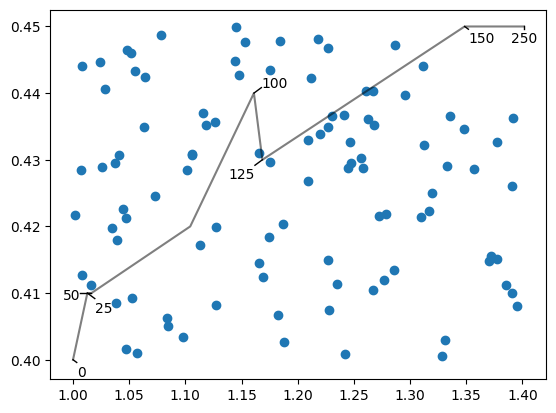

In [8]:
together = [(0, 1.0, 0.4), (25, 1.0127692669427917, 0.41), (50, 1.016404709797609, 0.41), (75, 1.1043426359673716, 0.42), (100, 1.1610446924342996, 0.44), (125, 1.1685687930691457, 0.43), (150, 1.3486407784550272, 0.45), (250, 1.4013999168008104, 0.45)]
together.sort()
np.random.seed(0)
x, y = np.random.random((2,100))
x = x*0.4+1
y = y*0.05+0.4

text = [str(x) for (x,y,z) in together]
eucs = [y for (x,y,z) in together]
covers = [z for (x,y,z) in together]
fig,ax = plt.subplots()
ax.plot(eucs,covers,color="black", alpha=0.5)
ax.scatter(x,y)
fig, ax = ta.allocate_text(fig, ax, eucs, covers, text, ax.get_xlim(), ax.get_ylim(), x_scatter=x, y_scatter=y, x_lines=[eucs], y_lines=[covers], draw_lines=True)
plt.show()

### Scattertext

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import scattertext as st
from textalloc.find_non_overlapping import get_non_overlapping_patches


def pyplot_from_scattertext_structure(
    scatterplot_structure,
    figsize,
    textsize,
    distance_margin_fraction,
    scatter_size,
    cmap,
    sample,
    xlabel,
    ylabel,
    dpi,
):
    # Extract the data
    if sample > 0:
        subset = random.sample(
            scatterplot_structure._visualization_data.word_dict["data"], sample
        )
    else:
        subset = scatterplot_structure._visualization_data.word_dict["data"]
    df = pd.DataFrame(subset)
    if (
        "etc" in scatterplot_structure._visualization_data.word_dict["data"][0]
        and "ColorScore"
        in scatterplot_structure._visualization_data.word_dict["data"][0]["etc"]
    ):
        df["s"] = [d["etc"]["ColorScore"] for d in subset]
    info = scatterplot_structure._visualization_data.word_dict["info"]
    n_docs = len(scatterplot_structure._visualization_data.word_dict["docs"]["texts"])
    n_words = df.shape[0]

    if scatterplot_structure._show_characteristic:
        characteristic_terms = list(
            df.sort_values("bg", axis=0, ascending=False).iloc[:23].term
        )

    if df.s.isna().sum() > 0:
        colors = "k"
    else:
        colors = df.s

    # Initiate plotting
    fig, ax_plot = plt.subplots(1, 1, figsize=figsize, dpi=dpi)
    plt.tight_layout()
    ax_plot.scatter(df.x, df.y, c=colors, s=scatter_size, cmap=cmap)

    # Run pre-labeling to determine textbox sizes
    print("Creating patches")
    original_patches = []
    for x, y, s in tqdm(zip(df.x, df.y, df.term)):
        ann = ax_plot.text(x, y, s, size=textsize)
        patch = ax_plot.transData.inverted().transform(
            ann.get_tightbbox(fig.canvas.get_renderer())
        )
        w, h = patch[1][0] - patch[0][0], patch[1][1] - patch[0][1]
        original_patches.append((x, y, w, h, s))
        ann.remove()
    xlims = ax_plot.get_xlim()
    ylims = ax_plot.get_ylim()

    # Process extracted textboxes
    print("Processing")
    fig, ax_plot = ta.allocate_text(fig, ax_plot, df.x, df.y, df.term, ax_plot.get_xlim(), ax_plot.get_ylim(), x_scatter=df.x, y_scatter=df.y, draw_lines=True, distance_margin_fraction=distance_margin_fraction)

    # Design settings
    ax_plot.spines.right.set_visible(False)
    ax_plot.spines.top.set_visible(False)
    if xlabel is not None:
        ax_plot.set_xlabel(xlabel)
    if ylabel is not None:
        ax_plot.set_ylabel(ylabel)
    ax_plot.locator_params(axis="y", nbins=3)
    ax_plot.locator_params(axis="x", nbins=3)
    try:
        if scatterplot_structure._x_axis_labels is not None:
            ax_plot.set_xticks(
                ax_plot.get_xticks()[1:-1], scatterplot_structure._x_axis_labels, size=7
            )
        else:
            ax_plot.set_xticks(
                ax_plot.get_xticks()[1:-1], ["Low", "Medium", "High"], size=7
            )
    except:
        pass
    try:
        if scatterplot_structure._y_axis_labels is not None:
            ax_plot.set_yticks(
                ax_plot.get_yticks()[1:-1],
                scatterplot_structure._y_axis_labels,
                size=7,
                rotation=90,
            )
        else:
            ax_plot.set_yticks(
                ax_plot.get_yticks()[1:-1],
                ["Low", "Medium", "High"],
                size=7,
                rotation=90,
            )
    except:
        pass
    ax_plot.plot(
        [xlims[0], xlims[1]],
        [ylims[0], ylims[1]],
        color="k",
        linestyle="dashed",
        linewidth=1,
        alpha=0.3,
    )

    return fig

In [25]:
convention_df = st.SampleCorpora.ConventionData2012.get_data().assign(
	parse = lambda df: df.text.apply(st.whitespace_nlp_with_sentences)
)
corpus = st.CorpusFromParsedDocuments(convention_df, category_col='party', parsed_col='parse').build()

In [32]:
structure = st.produce_scattertext_explorer(
	corpus,
	category='republican',
	category_name='Republican',
	not_category_name='Democratic',
	minimum_term_frequency=5,
	pmi_threshold_coefficient=8,
	width_in_pixels=1000,
	metadata=convention_df['speaker'],
	d3_scale_chromatic_url='scattertext/data/viz/scripts/d3-scale-chromatic.v1.min.js',
	d3_url='scattertext/data/viz/scripts/d3.min.js',
    return_scatterplot_structure=True,
)

/home/ckjellson/anaconda3/envs/textalloc/lib/python3.9/site-packages/scattertext/ScatterChart.py:439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_df['cat25k'] = (((term_freq_df[category + ' freq'] * 1.
/home/ckjellson/anaconda3/envs/textalloc/lib/python3.9/site-packages/scattertext/ScatterChart.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_df['ncat25k'] = (((term_freq_df['not cat freq'] * 1.
/home/ckjellson/anaconda3/envs/textalloc/lib/python3.9/site-packages/scattertext/ScatterChart.py:

Creating patches


1949it [00:01, 1376.18it/s]


Processing


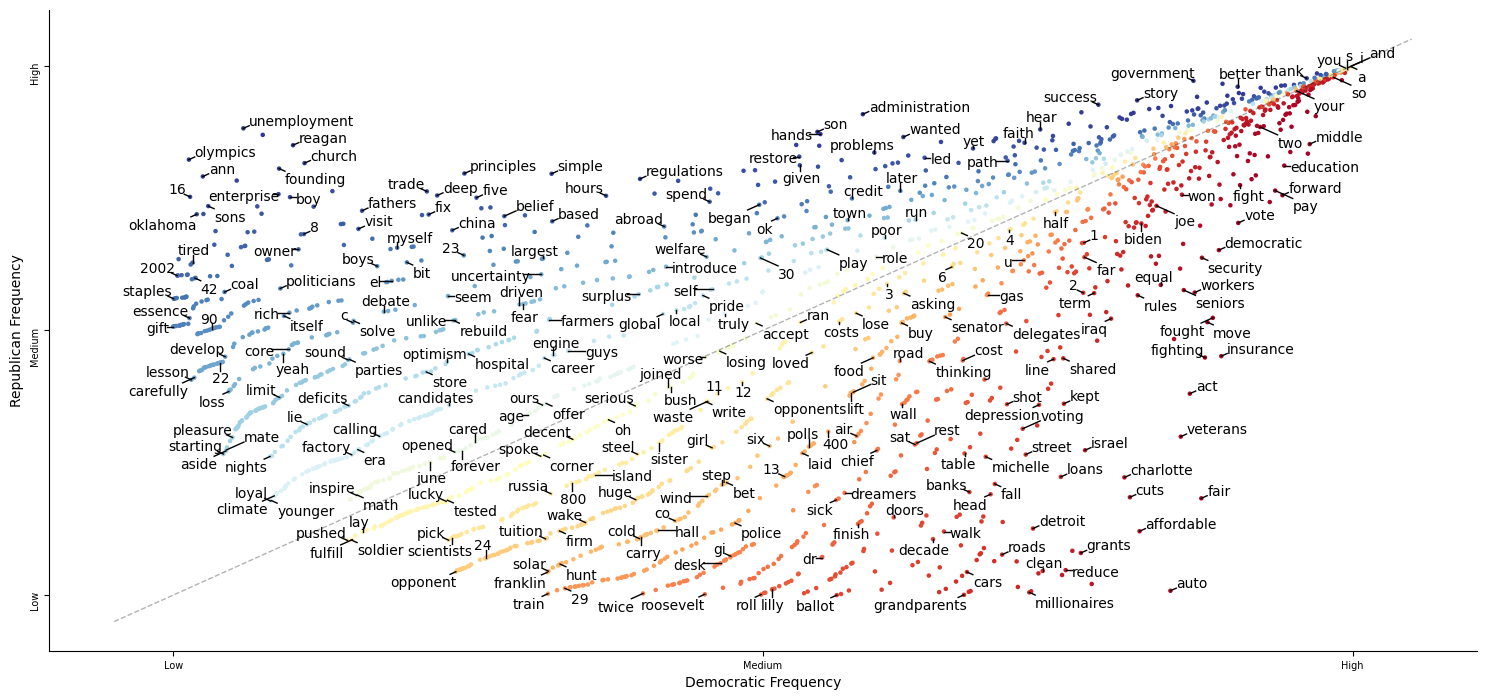

In [40]:
fig = pyplot_from_scattertext_structure(
    structure,
    figsize=(15, 7),
    textsize=7,
    distance_margin_fraction=0.009,
    scatter_size=5,
    cmap="RdYlBu",
    sample=0,
    xlabel="Democratic Frequency",
    ylabel="Republican Frequency",
    dpi=100,
)
plt.show()

### Implementation of line-rectangle overlap

In [60]:
def ccw(x1y1, x2y2, x3y3, cand):
    if cand:
        w1 = -(x1y1[:,1][:,None]-x3y3[:,1])
        w2 = np.repeat(x2y2[:,0:1]-x1y1[:,0:1],x3y3.shape[0],axis=1)
        w3 = np.repeat(x2y2[:,1:2]-x1y1[:,1:2],x3y3.shape[0],axis=1)
        w4 = -(x1y1[:,0][:,None]-x3y3[:,0])
        return (w1*w2)>(w3*w4)
    w1 = -(x1y1[:,1][:,None]-x3y3[:,1])
    w2 = -(x1y1[:,0][:,None]-x2y2[:,0])
    w3 = -(x1y1[:,1][:,None]-x2y2[:,1])
    w4 = -(x1y1[:,0][:,None]-x3y3[:,0])
    return (w1*w2)>(w3*w4)

def line_intersect(cand_xyxy, lines_xyxy):
    z1 = ccw(cand_xyxy[:,:2], lines_xyxy[:,:2], lines_xyxy[:,2:], False)
    z2 = ccw(cand_xyxy[:,2:], lines_xyxy[:,:2], lines_xyxy[:,2:], False)
    z3 = ccw(cand_xyxy[:,:2], cand_xyxy[:,2:], lines_xyxy[:,:2], True)
    z4 = ccw(cand_xyxy[:,:2], cand_xyxy[:,2:], lines_xyxy[:,2:], True)
    intersects = np.bitwise_and(z1!=z2,z3!=z4)
    return intersects

def non_overlapping_with_lines(
    lines_xyxy: np.ndarray, candidates: np.ndarray, xfrac: float, yfrac: float
) -> np.ndarray:
    y1 = line_intersect(np.hstack([candidates[:,0:1]-xfrac,candidates[:,1:2]-yfrac,candidates[:,0:1]-xfrac,candidates[:,3:]+yfrac]), lines_xyxy)
    y2 = line_intersect(np.hstack([candidates[:,0:1]-xfrac,candidates[:,3:]+yfrac,candidates[:,2:3]+xfrac,candidates[:,3:]+yfrac]), lines_xyxy)
    y3 = line_intersect(np.hstack([candidates[:,2:3]+xfrac,candidates[:,3:]+yfrac,candidates[:,2:3]+xfrac,candidates[:,1:2]-yfrac]), lines_xyxy)
    y4 = line_intersect(np.hstack([candidates[:,2:3]+xfrac,candidates[:,1:2]-yfrac,candidates[:,0:1]-xfrac,candidates[:,1:2]-yfrac]), lines_xyxy)
    non_intersecting = np.invert(np.any(np.bitwise_or(y1,np.bitwise_or(y2,np.bitwise_or(y3,y4))),axis=1))

    x1 = candidates[:, 0][:, None]-xfrac < lines_xyxy[:, 0]
    x2 = candidates[:, 1][:, None]-yfrac < lines_xyxy[:, 1]
    x3 = candidates[:, 2][:, None]+xfrac > lines_xyxy[:, 0]
    x4 = candidates[:, 3][:, None]+yfrac > lines_xyxy[:, 1]
    x5 = candidates[:, 0][:, None]-xfrac < lines_xyxy[:, 2]
    x6 = candidates[:, 1][:, None]-yfrac < lines_xyxy[:, 3]
    x7 = candidates[:, 2][:, None]+xfrac > lines_xyxy[:, 2]
    x8 = candidates[:, 3][:, None]+yfrac > lines_xyxy[:, 3]
    non_inside = np.invert(np.any(np.bitwise_and(x1,np.bitwise_and(x2,np.bitwise_and(x3,np.bitwise_and(x4,np.bitwise_and(x5,np.bitwise_and(x6,np.bitwise_and(x7,x8))))))),axis=1))

    return np.bitwise_and(non_intersecting, non_inside)

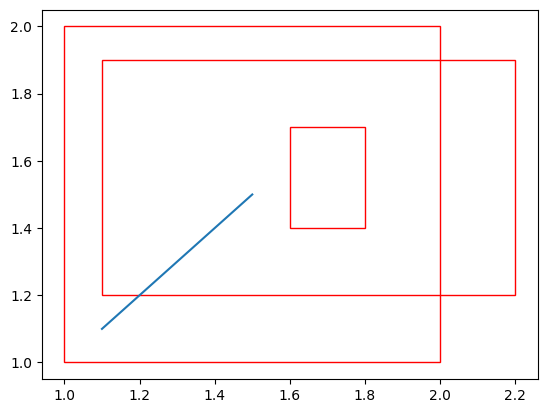

[False False  True]


In [61]:
candidates = np.array([[1,1,2,2],[1.1,1.2,2.2,1.9],[1.6,1.4,1.8,1.7]])
lines_xyxy = np.array([[1.1,1.1,1.5,1.5]])
fig,ax = plt.subplots()
for i in range(lines_xyxy.shape[0]):
    ax.plot([lines_xyxy[i,0],lines_xyxy[i,2]],[lines_xyxy[i,1],lines_xyxy[i,3]])
for i in range(candidates.shape[0]):
    rect = patches.Rectangle((candidates[i,0], candidates[i,1]), candidates[i,2]-candidates[i,0], candidates[i,3]-candidates[i,1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()
xfrac = 0.0
yfrac = 0.0
print(non_overlapping_with_lines(
    lines_xyxy, candidates, xfrac, yfrac
))